<img src='../../images/besm.png' width='150px'>

<center> درس پردازش زبان‌های طبیعی </center>
<center> آزمایشگاه پردازش هوشمند متن و زبان و علوم انسانی محاسباتی </center>
<center> آخرین بروز رسانی بهمن ۱۴۰۱ </center>

<br>
<center> http://language.ml </center>
<center> contact: info [AT] language [dot] ml </center>


<h1 style='direction:rtl'> 
      فارسی - پیش پردازش و بررسی متن
</h1>
  

<h4 style='direction:rtl;'> مثال بررسی اولیه داده غزلیات حافظ و سعدی. برای مطالعه بیشتر به مقاله زیر مراجعه کنید  </h4> 

<br/>

Asgari, Ehsaneddin, and Jean-Cédric Chappelier. <b>Linguistic resources and topic models for the analysis of persian poems.</b> <i>Proceedings of NAACL-HLT Workshop on Computational Linguistics for Literature. 2013 </i>.

https://aclanthology.org/W13-1404.pdf 

# Parsi-IO 

### https://github.com/language-ml/parsi.io

تلاش گروهی متن‌باز برای استخراج اطلاعات فارسی

In [44]:
from parsi_io.modules.address_extractions import AddressExtraction
extractor = AddressExtraction()
extractor.run('آدرس خیابان شهیدبهشتی می‌باشد و برای اطلاعات بیشتر به page.com مراجعه فرمایید')

{'address': ['آدرس خیابان شهیدبهشتی'],
 'email': [],
 'url': ['page.com'],
 'number': [],
 'address_span': [0, 21],
 'email_span': [],
 'url_span': [54, 62],
 'number_span': []}

In [45]:
from parsi_io.modules.number_extractor import NumberExtractor
extractor = NumberExtractor()
extractor.run(" یک صد و بیست میلیون تومان هزینه داشت")

[{'span': [1, 20], 'phrase': 'یک صد و بیست میلیون', 'value': 120000000}]

In [46]:
from parsi_io.modules.time_extractions import TimeExtraction
extractor = TimeExtraction()
extractor.run("روز  ۷ اسفند کتابخانه پانزده خرداد می آیم")

{'spans': {'datetime': [[0, 12], [22, 34]],
  'date': [[0, 12], [22, 34]],
  'time': []},
 'markers': {'datetime': {'[0, 12]': 'روز  ۷ اسفند',
   '[22, 34]': 'پانزده خرداد'},
  'date': {'[0, 12]': 'روز  ۷ اسفند', '[22, 34]': 'پانزده خرداد'},
  'time': {}},
 'values': '',
 'ner': [('روز', 'B-DAT'),
  ('۷', 'I-DAT'),
  ('اسفند', 'I-DAT'),
  ('کتابخانه', 'O'),
  ('پانزده', 'B-DAT'),
  ('خرداد', 'I-DAT'),
  ('می', 'O'),
  ('آیم', 'O')]}

<h2 style='direction:rtl;'> § نمونه‌ای از متن  </h2> 



In [7]:
import random 
import numpy as np
import nltk
import pandas as pd
import codecs
import tqdm

#tqdm.tqdm_notebook()
    
# Path of poems
poem_path = "../../exploring-datasets/literature/iranian"
HAFEZ_end=8384
SAADI_start=9384
mesra_collection = [x.strip() for x in tqdm.notebook.tqdm(codecs.open(F'{poem_path}/qazals/all_qazals_mesra.txt','rU','utf-8').readlines())]

  0%|          | 0/329707 [00:00<?, ?it/s]

In [8]:
mesra_collection[0]

'الا یا ایها الساقی ادر کاسا و ناولها'

<h2 style='direction:rtl;'> § نرمالایز کردن  </h2> 



# Hazm 

### https://github.com/roshan-research/hazm

In [9]:
from __future__ import unicode_literals
from hazm import *

hazm_normalizer = Normalizer()

mesra_normalized_hazm = [hazm_normalizer.normalize(x) for x in tqdm.notebook.tqdm(mesra_collection)]

  0%|          | 0/329707 [00:00<?, ?it/s]

# Dadmatools 

### https://github.com/Dadmatech/DadmaTools
### https://aclanthology.org/2022.naacl-demo.13

In [10]:
from dadmatools.models.normalizer import Normalizer

dadma_normalizer = Normalizer(
    full_cleaning=True,
    unify_chars=True,
    refine_punc_spacing=True,
    remove_extra_space=True,
    remove_puncs=False,
    remove_html=False,
    remove_stop_word=False,
    replace_email_with="<EMAIL>",
    replace_number_with="<NUM>",
    replace_url_with="",
    replace_mobile_number_with=None,
    replace_emoji_with=None,
    replace_home_number_with=None,
)

mesra_normalized_dadma = [dadma_normalizer.normalize(x) for x in tqdm.notebook.tqdm(mesra_collection)]

  0%|          | 0/329707 [00:00<?, ?it/s]

In [11]:
random_mesra = random.sample(range(0,len(mesra_collection)),10)
examples = ["روحُ القدس2 ","می توانم"]



df = pd.DataFrame({'original_text':[mesra_collection[idx] for idx in random_mesra]+examples,
                   'hazm_normalized':[mesra_normalized_hazm[idx] for idx in random_mesra]
                       +[hazm_normalizer.normalize(e) for e in examples],
                   'dadma_normalized':[mesra_normalized_dadma[idx] for idx in random_mesra]
                       +[dadma_normalizer.normalize(e) for e in examples]
                  })
df

,original_text,hazm_normalized,dadma_normalized
0,شعله‌درجانی‌که‌خاک حسرت‌دیدار نیست,شعله‌درجانی‌که‌خاک حسرت‌دیدار نیست,شعله‌درجانی‌که‌خاک حسرت‌دیدار
1,هر که ساغر کشد از دست تو بد مستم من,هر که ساغر کشد از دست تو بد مستم من,ساغر کشد دست مستم
2,گداخت شرم رقم‌کلک شق ندیدهٔ ما را,گداخت شرم رقم‌کلک شق ندیدهٔ ما را,گداخت شرم رقم‌کلک شق ندیدهٔ
3,عالمی را بر بساط خاک بود اقرار عجز,عالمی را بر بساط خاک بود اقرار عجز,عالمی بساط خاک اقرار عجز
4,چو هست حافظ مسکین غلام و چاکر دوست,چو هست حافظ مسکین غلام و چاکر دوست,حافظ مسکین غلام چاکر دوست
5,اینجا هجوم آینه پشت پلنگ بود,اینجا هجوم آینه پشت پلنگ بود,هجوم آینه پلنگ
6,خود را به دل سوخته بستیم و گذشتیم,خود را به دل سوخته بستیم و گذشتیم,دل سوخته بستیم گذشتیم
7,کشتهٔ عقشم و بر خاک درش,کشتهٔ عقشم و بر خاک درش,کشتهٔ عقشم خاک درش
8,ای ز تو بیمار حبیب و طبیب,ای ز تو بیمار حبیب و طبیب,بیمار حبیب طبیب
9,بیا ای عقل کل با من که بردابرد او بینی,بیا ای عقل کل با من که بردابرد او بینی,عقل بردابرد بینی


<h2 style='direction:rtl;'> § جمله‌بندی  </h2> 



In [12]:
mesra_sentences = [sent_tokenize(x) for x in tqdm.notebook.tqdm(mesra_normalized_hazm)]

  0%|          | 0/329707 [00:00<?, ?it/s]

In [13]:
random_mesra = random.sample(range(0,len(mesra_collection)),10)
examples = ["علی به خانه رفت . آنجا دو روز ماند. ","ای.آی مخفف هوش مصنوعی است"]



df = pd.DataFrame({'original_text':[mesra_collection[idx] for idx in random_mesra]+examples,
                   'hazm_text':['---'.join(mesra_sentences[idx]) for idx in random_mesra]
                       +['---'.join(sent_tokenize(e)) for e in examples],
                  })
df

,original_text,hazm_text
0,نقش بهشت یک یک هم در جهان بیابی,نقش بهشت یک یک هم در جهان بیابی
1,ایمن پس ازین ز چشم دشمن,ایمن پس ازین ز چشم دشمن
2,شکست در پر رنگ تو کرد پروازش,شکست در پر رنگ تو کرد پروازش
3,فرق میان کان و کان هست به زرنماییی,فرق میان کان و کان هست به زرنماییی
4,جمال یار ندارد نقاب و پرده ولی,جمال یار ندارد نقاب و پرده ولی
5,خیال روی شه را سجده می‌کن,خیال روی شه را سجده می‌کن
6,ای کوه از حلمت خجل وز حلم تو گستاخ دل,ای کوه از حلمت خجل وز حلم تو گستاخ دل
7,مائیم و جام باده و جانان جاودان,مائیم و جام باده و جانان جاودان
8,در شهر مانده همچو سگان داغدار تو,در شهر مانده همچو سگان داغدار تو
9,عشق تو پرده، صد هزار نهاد,عشق تو پرده، صد هزار نهاد


<h2 style='direction:rtl;'> § توکنایزیشن  </h2> 



In [14]:
mesra_tokens = [[word_tokenize(sent) for sent in sents] for sents in tqdm.notebook.tqdm(mesra_sentences)]

  0%|          | 0/329707 [00:00<?, ?it/s]

In [17]:
random_mesra = random.sample(range(0,len(mesra_collection)),10)
examples = [" او خوش‌برخورد است"]



df = pd.DataFrame({'original_text':[mesra_collection[idx] for idx in random_mesra]+examples,
                   'hazm_text':[mesra_tokens[idx] for idx in random_mesra]
                       +[word_tokenize(hazm_normalizer.normalize(e)) for e in examples],
                  })
df

,original_text,hazm_text
0,گه پاس خیالش را شب زنده همی دارم,"[[گه, پاس, خیالش, را, شب, زنده, همی, دارم]]"
1,دارد ز نشان قدمش‌ گردن ما غل,"[[دارد, ز, نشان, قدمش‌, گردن, ما, غل]]"
2,که زلف‌ها ز جمال بتان حجاب کند,"[[که, زلف‌ها, ز, جمال, بتان, حجاب, کند]]"
3,در سینهٔ خار اشارات او به غیر,"[[در, سینهٔ, خار, اشارات, او, به, غیر]]"
4,تا چه افتادست کز چشم شما افتاده‌ام,"[[تا, چه, افتادست, کز, چشم, شما, افتاده‌ام]]"
5,کس به امید وفا ترک دل و دین مکناد,"[[کس, به, امید, وفا, ترک, دل, و, دین, مکناد]]"
6,ز دست ما کشیدی طره و صد جا گره بستی,"[[ز, دست, ما, کشیدی, طره, و, صد, جا, گره, بستی]]"
7,اگر شخص سنایی را جهان سفله یارستی,"[[اگر, شخص, سنایی, را, جهان, سفله, یارستی]]"
8,سید مستان این حضرت نگر,"[[سید, مستان, این, حضرت, نگر]]"
9,زهی خرمن که سوی این سیه خرمن نمی‌آیی,"[[زهی, خرمن, که, سوی, این, سیه, خرمن, نمی‌آیی]]"


<h2 style='direction:rtl;'> § تحلیل بسامد  </h2> 

In [18]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
from nltk import FreqDist
import itertools
import pandas as pd

all_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens)))
hafez_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens[0:HAFEZ_end])))
saadi_tokens = list(itertools.chain(*itertools.chain(*mesra_tokens[SAADI_start::])))

dataframe = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe[opt] = FreqDist(eval(F"{opt}_tokens")).most_common(25)

freq_analysis = pd.DataFrame(dataframe)    

In [20]:
freq_analysis

,hafez,saadi,all
0,"(که, 2404)","(و, 61532)","(و, 63910)"
1,"(و, 2190)","(از, 54663)","(که, 56516)"
2,"(به, 1791)","(که, 53845)","(از, 56238)"
3,"(از, 1423)","(به, 49965)","(به, 51959)"
4,"(در, 1237)","(در, 45431)","(در, 46796)"
5,"(تو, 829)","(تو, 38489)","(تو, 39471)"
6,"(ز, 747)","(را, 30248)","(را, 31040)"
7,"(این, 660)","(ز, 28999)","(ز, 29785)"
8,"(آن, 652)","(من, 25649)","(من, 26326)"
9,"(من, 615)","(بر, 21734)","(بر, 22356)"


In [21]:
print ('%-16s' % 'Number of words', '%-16s' % len(all_tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(all_tokens)))
avg=np.sum([len(word) for word in all_tokens])/len(all_tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % all_tokens[np.argmax([len(word) for word in all_tokens])])

Number of words  2344140         
Number of unique words 100042          
Average word length 3.4612343972629622
Longest word     توبمن‌بگو‌که‌چه‌رای‌تست‌بکنم‌من‌آنچه‌رضای


<h2 style='direction:rtl;'> § حذف stop-word  </h2> 

In [22]:
# Persian Stopwords
# https://github.com/sobhe/hazm/blob/master/hazm/data/stopwords.dat
stop_path = '../../resources/persian_stopwords.txt'
stopwords = [hazm_normalizer.normalize(x.strip()) for x in codecs.open(stop_path,'r','utf-8').readlines()]

In [23]:
stop_path_poems = '../../resources/persian_stopwords-poems.txt'
stopwords = stopwords + [hazm_normalizer.normalize(x.strip()) for x in codecs.open(stop_path_poems,'r','utf-8').readlines()]

In [24]:
all_tokens_nonstop = [t for t in tqdm.tqdm(all_tokens) if t not in stopwords]
hafez_tokens_nonstop = [t for t in tqdm.tqdm(hafez_tokens) if t not in stopwords]
saadi_tokens_nonstop = [t for t in tqdm.tqdm(saadi_tokens) if t not in stopwords]

dataframe_nonstop = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe_nonstop[opt] = FreqDist(eval(F"{opt}_tokens_nonstop")).most_common(50)

freq_analysis_nonstop = pd.DataFrame(dataframe_nonstop)    

100%|██████████████████████████████████████████████████████| 2274916/2274916 [00:08<00:00, 253065.94it/s]


<h4 style='direction:rtl;'> برای داده خود لیست stop-word ها را بهبود بدهید </h4> 

In [25]:
freq_analysis_nonstop

,hafez,saadi,all
0,"(دل, 541)","(دل, 21082)","(دل, 21670)"
1,"(حافظ, 454)","(جان, 12944)","(جان, 13200)"
2,"(ای, 385)","(سر, 12579)","(سر, 12975)"
3,"(سر, 358)","(ای, 12024)","(ای, 12440)"
4,"(باد, 232)","(عشق, 10293)","(عشق, 10524)"
5,"(جان, 228)","(چشم, 6812)","(چشم, 7033)"
6,"(دست, 204)","(دست, 5861)","(دست, 6110)"
7,"(عشق, 203)","(آب, 4773)","(آب, 4899)"
8,"(خوش, 201)","(غم, 4637)","(غم, 4799)"
9,"(گل, 198)","(جهان, 4547)","(گل, 4719)"


<h2 style='direction:rtl;'> § استفاده از lemmatization, stemming  </h2> 

In [26]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)
    if opt ==3:
        # write your own
        pass

In [27]:
#<NUM> <DATE> 

In [28]:
opt = 2

all_tokens_nonstop_lemstem =   [get_lemma_set(t, opt) for t in tqdm.tqdm(all_tokens_nonstop)]
hafez_tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm.tqdm(hafez_tokens_nonstop)]
saadi_tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm.tqdm(saadi_tokens_nonstop)]

dataframe_nonstop_lemstem = {}

for opt in ['hafez', 'saadi', 'all']:
     dataframe_nonstop_lemstem[opt] = FreqDist(eval(F"{opt}_tokens_nonstop_lemstem")).most_common(50)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|██████████████████████████████████████████████████████| 1387785/1387785 [00:02<00:00, 680961.34it/s]


,hafez,saadi,all
0,"(دل, 676)","(دل, 26095)","(دل, 26831)"
1,"(حافظ, 458)","(جان, 15209)","(جان, 15495)"
2,"(سر, 388)","(سر, 13541)","(سر, 13971)"
3,"(ای, 387)","(ای, 12082)","(ای, 12500)"
4,"(گفت#گو, 255)","(عشق, 11840)","(عشق, 12100)"
5,"(جان, 253)","(چشم, 8448)","(چشم, 8720)"
6,"(باد, 244)","(گفت#گو, 7432)","(گفت#گو, 7723)"
7,"(کرد#کن, 235)","(آمد#آ, 7098)","(آمد#آ, 7285)"
8,"(چشم, 233)","(کرد#کن, 6757)","(کرد#کن, 7023)"
9,"(عشق, 226)","(دست, 6515)","(دست, 6774)"


<h2 style='direction:rtl;'> § استفاده از POS-tags  </h2> 

In [29]:
tagger = POSTagger(model='../../resources/postagger.model')

In [30]:
import copy
dataframe_nonstop_lemstem_advjj = {}

for opt in tqdm.tqdm(['hafez', 'saadi', 'all']):
    selected = []
    for x,y in FreqDist(eval(F"{opt}_tokens_nonstop_lemstem")).most_common(1000):
        pos = tagger.tag([x])[0][1]
        if pos in ['V']:
            selected.append((x,y)) 
    dataframe_nonstop_lemstem_advjj[opt]= copy.deepcopy(selected[0:40])

dataframe_nonstop_lemstem_advjj = pd.DataFrame(dataframe_nonstop_lemstem_advjj)    

100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.96it/s]


In [31]:
# change the code to get the POS's in the sentences

In [32]:
dataframe_nonstop_lemstem_advjj

,hafez,saadi,all
0,"(داد#ده, 96)","(گشت#گرد, 3342)","(گشت#گرد, 3380)"
1,"(افتاد#افت, 80)","(داد#ده, 2869)","(داد#ده, 2980)"
2,"(مکن, 74)","(بست#بند, 2457)","(بست#بند, 2513)"
3,"(بست#بند, 51)","(افتاد#افت, 2233)","(افتاد#افت, 2319)"
4,"(کجاست, 39)","(مکن, 1812)","(مکن, 1890)"
5,"(گشت#گرد, 36)","(شو, 1316)","(شو, 1336)"
6,"(ببرد, 36)","(گشت, 1250)","(گشت, 1280)"
7,"(بیار, 36)","(اوست, 1222)","(اوست, 1257)"
8,"(چیست, 33)","(ماست, 1212)","(ماست, 1246)"
9,"(اوست, 33)","(چیست, 963)","(چیست, 996)"


<h2 style='direction:rtl;'> § دیدن سیاق  </h2> 

In [47]:
hafez_text = nltk.Text(hafez_tokens_nonstop_lemstem)
hafez_text.concordance('آب')

Displaying 25 of 25 matches:
بخارا داد#ده ساقی می‌باقی جنت یافت#یاب آب رکن آباد گلگشت مصلا فغان کاین لولیان ش
ک خوان یغما عشق ناتمام جمال یار مستغنی آب رنگ خال خط حاجت زیبا حسن روزافزون یوسف
ابات ایمان یار مرد خدا با کشتی نوح خاک آب خرید#خر طوفان برو خانه گردون نان مطلب 
رس صرفه نبرد روز بازخواست نان حلال شیخ آب حرام حافظ دیده دانه اشک همی‌فشان مرغ و
ق نعمت حاجی قوام ای فروغ ماه حسن رخشان آب چاه زنخدان عزم دیدار جان لب بازگردد بر
بخت خواب آلود بیدار مگر زان زد#زن دیده آب رخشان صبا همراه فرستاد#فرست رخت گلدسته
قدس کشید#کش بند نقاب ای مرغ بهشتی دانه آب خوابید#خواب بشد دیده جگرسوز کاغوش منزل
اد شنید#شنو پیداست نگارا بلند جنابت سر آب بادیه هش غول بیابان نفریبد سراب ره پیر
 انداخت#انداز شراب خورده خو رفت#رو چمن آب آتش ارغوان انداخت#انداز بزمگاه چمن دوش
دمی زین هوا مغبچگانم انداخت#انداز کنون آب می‌لعل خرقه شد#شو نصیبه ازل نمی‌توان ا
ریب دلسوز برف دل بیگانه بسوخت خرقه زهد آب خرابات ببرد خانه عقل آتش میخانه بسوخت 
فسوس دلبر دیده گریان تحریر خیال خط نقش آب بیدار شو ای دیده ایمن توانست#توان زین 

<h2 style='direction:rtl;'> § چانکینگ - عبارت یابی  </h2> 

In [48]:
for sent in mesra_tokens[0:10]:
    print(tagger.tag(sent[0]))
    print()

[('الا', 'RES'), ('یا', 'CONJ'), ('ایها', 'RES'), ('الساقی', 'RES'), ('ادر', 'RES'), ('کاسا', 'RES'), ('و', 'RES'), ('ناولها', 'RES')]

[('که', 'CONJ'), ('عشق', 'N'), ('آسان', 'AJ'), ('نمود', 'V'), ('اول', 'ADV'), ('ولی', 'CONJ'), ('افتاد', 'V'), ('مشکل\u200cها', 'N')]

[('به', 'P'), ('بوی', 'Ne'), ('نافه\u200cای', 'N'), ('کاخر', 'ADV'), ('صبا', 'ADV'), ('زان', 'P'), ('طره', 'N'), ('بگشاید', 'V')]

[('ز', 'Pe'), ('تاب', 'Ne'), ('جعد', 'Ne'), ('مشکینش', 'AJ'), ('چه', 'DET'), ('خون', 'N'), ('افتاد', 'V'), ('در', 'P'), ('دل\u200cها', 'N')]

[('مرا', 'PRO'), ('در', 'P'), ('منزل', 'Ne'), ('جانان', 'N'), ('چه', 'ADV'), ('امن', 'AJ'), ('عیش', 'N'), ('چون', 'CONJ'), ('هر', 'DET'), ('دم', 'N')]

[('جرس', 'N'), ('فریاد', 'N'), ('می\u200cدارد', 'V'), ('که', 'CONJ'), ('بربندید', 'V'), ('محمل\u200cها', 'N')]

[('به', 'P'), ('می\u200cسجاده', 'N'), ('رنگین', 'AJ'), ('کن', 'V'), ('گرت', 'CONJ'), ('پیر', 'Ne'), ('مغان', 'N'), ('گوید', 'V')]

[('که', 'CONJ'), ('سالک', 'N'), ('بی\u200cخبر', 'AJ'), ('نبود

In [49]:
tagger.tag(hazm_normalizer.normalize("حافظ خلوت نشین").split())

[('حافظ', 'N'), ('خلوت', 'AJ'), ('نشین', 'N')]

In [50]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      GHEIDV: {<ADV><V>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

In [51]:
tagger.tag(mesra_tokens[100][0])

[('چه', 'DET'),
 ('قیامت', 'N'),
 ('است', 'V'),
 ('جانا', 'N'),
 ('که', 'CONJ'),
 ('به', 'P'),
 ('عاشقان', 'Ne'),
 ('نمودی', 'N')]

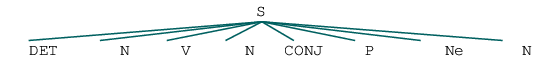

In [55]:
vasf_ext(tagger.tag(mesra_tokens[100][0]))

In [56]:
mosufs = []
gheids = []
for sentence in tqdm.tqdm(mesra_tokens[0:HAFEZ_end]):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|██████████████████████████████████████████████████████████████| 8384/8384 [00:02<00:00, 3443.03it/s]


In [57]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]

In [58]:
mosuf_texts[0:10]

['عشق آسان',
 'جعد مشکینش',
 'می\u200cسجاده رنگین',
 'سالک بی\u200cخبر',
 'شب تاریک',
 'حضوری\u200cگر همی\u200cخواهی',
 'چراغ مرده',
 'یاد خوشش',
 'رکن آباد',
 'کار شهرآشوب']

In [59]:
results = {}

results['hafez'] = nltk.FreqDist(mosuf_texts).most_common(50)

In [60]:
mosufs = []
gheids = []
for sentence in tqdm.tqdm(mesra_tokens[SAADI_start::]):
    tree=vasf_ext(tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|██████████████████████████████████████████████████████████| 320323/320323 [01:20<00:00, 3987.04it/s]


In [61]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
mosuf_texts[0:10]

['عشق غالب',
 'گلبن خندان',
 'سرو آزاد',
 'گل صدبرگ',
 'لبت کبابی',
 'داروی دلپذیر',
 'سرو روان',
 'گلبن نو',
 'معاشران هشیار',
 'چراغ باز']

In [62]:
results['saadi'] = nltk.FreqDist(mosuf_texts).most_common(50)

In [63]:
pd.DataFrame(results)

,hafez,saadi
0,"(چشم بد, 10)","(چشم بد, 99)"
1,"(ماه نو, 6)","(ماه نو, 82)"
2,"(یار سفرکرده, 5)","(سرو روان, 76)"
3,"(لب جوی, 5)","(دل خسته, 69)"
4,"(مرغ زیرک, 5)","(آب روان, 60)"
5,"(دل خوش, 5)","(دل پر, 56)"
6,"(خانه خمار, 4)","(دل تنگ, 51)"
7,"(خط مشکین, 4)","(سرو خرامان, 49)"
8,"(لب خندان, 4)","(دل دیوانه, 49)"
9,"(آب روان, 4)","(زین بیش, 48)"


# Keyword Extraction

In [49]:
#hafez = ' '.join([' '.join(s[0]) for s in mesra_tokens[0:8384]])
#saadi = ' '.join([' '.join(s[0]) for s in mesra_tokens[9384::]])
hafez= ' '.join(hafez_tokens_nonstop)
saadi= ' '.join(saadi_tokens_nonstop)

In [190]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(hafez)

for kw in keywords:
	print(kw)

('صبا خوش باد', 1.5717310111874307e-06)
('باد جان حافظ', 1.7620589953381176e-06)
('خاک کوی دوست', 2.0258379256253233e-06)
('جهان کار جهان', 2.0599975722001165e-06)
('حافظ دست زلف', 2.135603936274367e-06)
('خوش باد جان', 2.3152418604929834e-06)
('چشم مست یار', 2.355612085393515e-06)
('جام حافظ دست', 2.4005425339080584e-06)
('باد صبا بوی', 2.448761975715962e-06)
('حافظ خوش جهان', 2.4560940828741507e-06)
('دوست دست حافظ', 2.498288135019821e-06)
('باده دست حافظ', 2.6190903209798626e-06)
('خاک حافظ یار', 2.635852383974259e-06)
('دست دست زلف', 2.658976794178031e-06)
('باد جان دوست', 2.743931474301421e-06)
('دوست باد جان', 2.743931474301421e-06)
('جان جهان دست', 2.773468764968607e-06)
('باد یاد باد', 2.8053540950900776e-06)
('خون باد چشم', 2.944722766370703e-06)
('باد صبا چشم', 3.0790782504342644e-06)


In [156]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(saadi)

for kw in keywords:
	print(kw)

('جان جان جان', 2.2833394836229527e-07)
('جان جان', 1.1366942435601514e-06)
('عشق جان جان', 1.1847028962732852e-06)
('جان عشق جان', 1.3539461671694688e-06)
('جان', 1.5088792562298606e-06)
('جان جان عشق', 1.5796038616977135e-06)
('عشق', 2.3731267635454816e-06)
('عشق جان', 2.6261297938395834e-06)
('جان جهان', 3.778347811642447e-06)
('جان جهان جهان', 4.216109601275181e-06)
('درد عشق جان', 4.341958210280962e-06)
('جان جان مرا', 4.348109238077564e-06)
('چشم', 4.431687115744769e-06)
('عشق جانان جان', 4.974286549321777e-06)
('جان عشق', 5.140509383685994e-06)
('مرا', 5.385551363975612e-06)
('آتش عشق جان', 5.889191660781143e-06)
('عشق عشق جان', 5.9606705171342234e-06)
('دست', 6.065432213443196e-06)
('درد درد عشق', 6.509548927675216e-06)


# Dadma Tools

In [9]:
import dadmatools.pipeline.language as language

# here lemmatizer and pos tagger will be loaded
# as tokenizer is the default tool, it will be loaded as well even without calling
pips = 'tok,lem,pos,dep,ner,chunk,cons,kasreh' 
nlp = language.Pipeline(pips)

# you can see the pipeline with this code
print(nlp.analyze_pipes(pretty=True))

Model fa_tokenizer exists in /home/media/.pernlp/fa_tokenizer.pt
Model fa_mwt exists in /home/media/.pernlp/fa_mwt.pt
Model fa_lemmatizer exists in /home/media/.pernlp/fa_lemmatizer.pt
Model parsbert exists in /home/media/.pernlp/parsbert.tar.gz
Model dependencyparser exists in /home/media/.pernlp/dependencyparser.pt
2022-10-24 06:16:04,891 loading file /home/media/miniconda3/lib/python3.9/site-packages/dadmatools/saved_models/dependencyparser/dependencyparser.pt
Model parsbert exists in /home/media/.pernlp/parsbert.tar.gz
Model postagger exists in /home/media/.pernlp/postagger.pt
2022-10-24 06:16:06,450 loading file /home/media/miniconda3/lib/python3.9/site-packages/dadmatools/saved_models/postagger/postagger.pt
Model fa_constituency exists in /home/media/.pernlp/fa_constituency.pt
Model ner exists in /home/media/.pernlp/ner.tar.gz
Model kasreh_ezafeh exists in /home/media/.pernlp/kasreh_ezafeh.pt


/home/media/miniconda3/lib/python3.9/site-packages/dadmatools/models/common/beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords
[2022-10-24 06:16:09,688 INFO] [Ensembling dict with seq2seq lemmatizer...]



============================= Pipeline Overview =============================

#   Component            Assigns       Requires   Scores   Retokenizes
-   ------------------   -----------   --------   ------   -----------
0   tokenizer                                              True       
                                                                      
1   lemmatize            token.lemma                       False      
                                                                      
2   dependancyparser     token.dep                         False      
                                                                      
3   postagger            token.pos                         False      
                                                                      
4   chunking                                               False      
                                                                      
5   constituencyparser                                     False    

In [10]:
doc = nlp('مسابقات کشتی در کشور ایران برگزار خواهد شد')

[2022-10-24 06:16:14,341 INFO] [Ensembling dict with seq2seq lemmatizer...]


In [17]:
doc._.ners

[[('[CLS]', 'O'),
  ('مسابقات', 'O'),
  ('کشتی', 'O'),
  ('در', 'O'),
  ('کشور', 'O'),
  ('ایران', 'B-location'),
  ('برگزار', 'O'),
  ('خواهد', 'O'),
  ('شد', 'O'),
  ('[SEP]', 'O')]]

In [16]:
doc._.constituency 

[(TOP (S (NP (NP (_ مسابقات)) (_ کشتی) (_ در) (_ کشور)) (PP (_ ایران) (NP (_ برگزار) (NP (_ خواهد) (_ شد))))))]

In [8]:
from spacy import displacy

displacy.serve(doc, style="dep")

/home/media/miniconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# Weighted Levenshtein Distance

In [1]:
#!pip install -U strsimpy
import pandas as pd
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    return 2.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)

In [2]:
print(weighted_levenshtein.distance('لانه', 'لثه'))

3.0


In [3]:
print(weighted_levenshtein.distance('لانه', 'لاله'))

2.0


In [40]:
print(weighted_levenshtein.distance('لانه', 'لستم'))

6.0


In [41]:
print(weighted_levenshtein.distance('لثه', 'لستم'))

5.0
